In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

c:\Users\AOUALDC\OneDrive - Mercedes-Benz (corpdir.onmicrosoft.com)\Udacity - Data Scientist\venv_Udacity_Prj_1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Business Understanding

In [ ]:
# Questions to be answered:
# 1. “Which socio-economic factors best explain differences in GDP per capita according to an country-example?” -> SHAP + LinearRegerssion
# ->Stakeholder: Government: identify where investments (e.g., education, health) are most effective.
# 2. “To what extent can development indicators (e.g., health, education, demographics) be used to predict a country’s GDP per capita?” -> RMSE as metric
# ->Stakeholder: World Bank: support GDP estimations in countries with uncertain/missing data.
# 3. "Which countries are under-/over-predicted (residual analysis) and what does that imply?"

In [4]:
# The target will be the feature 'GDP per capita (current US$)'.
# For the business understanding, interpretability is important,
# therefore a LinearRegression model (including a scaler) is chosen.
# The influencing factors will then be analyzed with SHAP.

# Data Understanding

In [5]:
wdi_raw_data = pd.read_csv('World_Development_Indicators_all_Countries\World_Development_Indicators_all_Countries_Data.csv')

In [6]:
wdi_raw_data

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Argentina,ARG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,63.879,58.79,55.022,49.926,41.751,31.492,28.54,25.767,26.414,..
1,Argentina,ARG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,5.1566859021408,6.26456582010254,5.23162237725058,4.53787889681146,5.3185559967348,6.35703367575527,7.29128249622041,6.63829697473642,5.92985376183283,5.98159930630507
2,Argentina,ARG,"Annual freshwater withdrawals, total (% of int...",ER.H2O.FWTL.ZS,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,..,..,..
3,Argentina,ARG,Domestic credit provided by financial sector (...,FS.AST.DOMS.GD.ZS,40.4276279370297,37.9322482578709,38.8683983871173,..,37.8443440962428,45.7796388175674,40.7222722878412,41.5386944065745,79.3319820963556,40.030199482303
4,Argentina,ARG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,3140.46420669387,3104.98925144338,3005.76483124641,2971.34364838317,2876.71852724712,2827.42739776861,2942.91077511635,2833.11909750338,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15836,Zimbabwe,ZWE,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.8226043687856,43.5952351370459,43.2827192633888,42.9204370069491,42.5422575941545,42.1837994135142,41.8719254855762,41.6115433791364,41.3232835325935,40.873763046968
15837,Zimbabwe,ZWE,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,52.955903991475,53.0989855409761,53.3298234556504,53.6144616378435,53.9235009569379,54.2345267694812,54.5301005683915,54.7802296158601,55.0583947080017,55.5245832086542
15838,Zimbabwe,ZWE,Population ages 65 and above (% of total popul...,SP.POP.65UP.TO.ZS,3.22149163973947,3.30577932197804,3.38745728096075,3.46510135520736,3.53424144890757,3.58167381700461,3.59797394603224,3.6082270050035,3.61832175940481,3.60165374437779
15839,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,14399013,14600294,14812482,15034452,15271368,15526888,15797210,16069056,16340822,16634373


In [7]:
wdi_raw_data.shape

(15841, 14)

In [8]:
wdi_raw_data.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]    object
2018 [YR2018]    object
2019 [YR2019]    object
2020 [YR2020]    object
2021 [YR2021]    object
2022 [YR2022]    object
2023 [YR2023]    object
2024 [YR2024]    object
dtype: object

In [9]:
# I need to change the data type of the features to numeric, 
# because later on LinearRegression needs numeric values.

# Furthermore, I need to reshape the dataframe, so the structure is easier to use.
# Years will be rows and the features columns.

In [10]:
# Drop two columns which are not needed.
wdi_raw_data_lean = wdi_raw_data.drop(['Country Code', 'Series Code'], axis=1)

# Null-values are respresented as ".." in the dataset. 
# For a better data understanding the string ".." will be replaced with NaN.
wdi_raw_data_with_NaN = wdi_raw_data_lean.replace('..', np.nan)

# Convert features to numeric.
wdi_data_dtype_change = wdi_raw_data_with_NaN.astype({'2015 [YR2015]': 'float', 
                                                      '2016 [YR2016]': 'float', 
                                                      '2017 [YR2017]': 'float',
                                                      '2018 [YR2018]': 'float', 
                                                      '2019 [YR2019]': 'float', 
                                                      '2020 [YR2020]': 'float',
                                                      '2021 [YR2021]': 'float', 
                                                      '2022 [YR2022]': 'float', 
                                                      '2023 [YR2023]': 'float',
                                                      '2024 [YR2024]': 'float', 
                                                     }
                                                    )

In [11]:
# Confirm the data type change
wdi_data_dtype_change.dtypes

Country Name      object
Series Name       object
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
2023 [YR2023]    float64
2024 [YR2024]    float64
dtype: object

In [ ]:
# Transform the dataframe structure as mentioned before. ~Script from ChatGPT OpenAI~
# Wide -> Long
wdi_data_long = (wdi_data_dtype_change
                 .melt(id_vars=['Country Name','Series Name'],
                       var_name='Year',
                       value_name='Value'
                      )
                )

# Clean "Year" column (only keep the year-information)
wdi_data_long['Year'] = wdi_data_long['Year'].str.extract(r'(\d{4})').astype(int)

# Set multi-index (Country Name, Year)
wdi_reshaped = wdi_data_long.set_index(['Country Name','Year','Series Name']).unstack('Series Name')

# Set features as column names
wdi_reshaped.columns = wdi_reshaped.columns.get_level_values(1)

wdi_reshaped

Series Name        Access to electricity (% of population)  \
Country Name Year                                            
Afghanistan  2015                                     71.5   
             2016                                     97.7   
             2017                                     97.7   
             2018                                     93.4   
             2019                                     97.7   
...                                                    ...   
Zimbabwe     2020                                     52.7   
             2021                                     49.0   
             2022                                     50.1   
             2023                                     62.0   
             2024                                      NaN   

Series Name        Access to electricity, rural (% of rural population)  \
Country Name Year                                                         
Afghanistan  2015                                               64.6      
             2016                                               97.1      
             2017                                               97.1      
             2018                                               91.6      
             2019                                               97.1      
...                                                              ...      
Zimbabwe     2020                                               37.1      
             2021                                               31.6      
             2022                                               33.7      
             2023                                               51.4      
             2024                                                NaN      

Series Name        Access to electricity, urban (% of urban population)  \
Country Name Year                                                         
Afghanistan  2015                                               92.5      
             2016                                               99.5      
             2017                                               99.5      
             2018                                               98.8      
             2019                                               99.5      
...                                                              ...      
Zimbabwe     2020                                               85.7      
             2021                                               85.3      
             2022                                               89.0      
             2023                                               84.0      
             2024                                                NaN      

Series Name        Adjusted net national income per capita (annual % growth)  \
Country Name Year                                                              
Afghanistan  2015                                                NaN           
             2016                                                NaN           
             2017                                                NaN           
             2018                                                NaN           
             2019                                                NaN           
...                                                              ...           
Zimbabwe     2020                                         -16.294088           
             2021                                          36.600250           
             2022                                                NaN           
             2023                                                NaN           
             2024                                                NaN           

Series Name        Adjusted net national income per capita (current US$)  \
Country Name Year                                                          
Afghanistan  2015                               

In [13]:
wdi_reshaped.describe()

Series Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","Self-employed, total (% of total employment) (modeled ILO estimate)",Tax revenue (% of GDP),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
count,1935.000000,1849.000000,1912.000000,1026.000000,1234.000000,1953.000000,2170.000000,2170.000000,2170.000000,1925.000000,...,479.000000,296.000000,1168.000000,1175.000000,1452.000000,1222.000000,1679.000000,1175.000000,1034.000000,2149.000000
mean,85.985840,81.818172,93.481799,1.388857,10823.401613,43.168447,58.076991,14.744254,43.332737,9.936910,...,22.089144,11.988176,92.023377,26.065343,101.620268,89.965618,40.296358,16.781040,16.203630,1.735590
std,24.644992,31.531482,14.238678,9.762354,14618.902497,39.019365,16.390457,10.559037,21.466202,9.751818,...,13.021714,9.198432,15.297355,13.029856,13.049045,26.276287,26.313182,6.479175,14.650170,1.744546
min,4.200000,0.400000,9.600000,-66.269346,150.032183,0.465000,17.355060,1.236299,15.063246,0.003895,...,0.000000,0.300000,20.554787,0.000081,8.447979,3.293810,0.394137,0.000063,0.003495,-10.884111
25%,84.850000,79.100000,95.800000,-1.378313,1586.930050,10.546000,47.348160,6.294999,25.814834,2.068036,...,13.300000,3.375000,87.990889,17.479289,96.576591,80.433122,16.072206,12.179980,6.551222,0.496003
50%,100.000000,100.000000,100.000000,1.988915,4331.734765,32.056000,54.331587,10.712949,35.733160,6.590108,...,20.300000,11.600000,96.428402,24.821425,100.610880,94.585659,33.939293,16.560202,12.203337,1.616885
75%,100.000000,100.000000,100.000000,4.865180,13246.919606,66.599000,66.911940,22.115886,59.617034,16.148779,...,25.200000,17.975000,99.906448,32.483786,106.110172,104.399124,61.832007,21.621408,21.145116,2.899263
max,100.000000,100.000000,100.000000,199.313930,77781.175705,178.400000,106.765509,74.791927,101.712713,43.059988,...,82.300000,40.700000,156.167175,138.995845,257.434204,164.079819,94.745216,44.402265,127.580662,8.659599


In [14]:
wdi_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2170 entries, ('Afghanistan', np.int64(2015)) to ('Zimbabwe', np.int64(2024))
Data columns (total 73 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Access to electricity (% of population)                                                             1935 non-null   float64
 1   Access to electricity, rural (% of rural population)                                                1849 non-null   float64
 2   Access to electricity, urban (% of urban population)                                                1912 non-null   float64
 3   Adjusted net national income per capita (annual % growth)                                           1026 non-null   float64
 4   Adjusted net national income per capita (current US$)       

In [15]:
# Investigation of the features gives us insights about linear-combinations.
# Column "Population ages 65 and above (% of total population)" can be
# dropped because with the other two columns "Population ages 0-14 (% of total population)"
# and "Population ages 15-64 (% of total population)" the data will add up to
# 100%. Therefore we drop one column in the data preperation so we are avoiding
# linear-combinations. 
# Same is for "Access to electricity, rural (% of rural population)".
# Same is for "Age dependency ratio, old (% of working-age population)"

In [16]:
wdi_reshaped.isna().sum()

Series Name
Access to electricity (% of population)                                     235
Access to electricity, rural (% of rural population)                        321
Access to electricity, urban (% of urban population)                        258
Adjusted net national income per capita (annual % growth)                  1144
Adjusted net national income per capita (current US$)                       936
                                                                           ... 
School enrollment, secondary (% gross)                                      948
Self-employed, total (% of total employment) (modeled ILO estimate)         491
Tax revenue (% of GDP)                                                      995
Total debt service (% of exports of goods, services and primary income)    1136
Urban population growth (annual %)                                           21
Length: 73, dtype: int64

In [17]:
# Data shows that multiple columns have a lot of NaN-values.
# In the 'Data Preperation Step', I will tackle this issue.

In [18]:
# Get correlation values of dataset
corr_matrix = wdi_reshaped.corr()

In [19]:
corr_matrix['GDP per capita (current US$)'].sort_values(ascending=False)

Series Name
GDP per capita (current US$)                                                                          1.000000
Adjusted net national income per capita (current US$)                                                 0.983271
Current health expenditure per capita (current US$)                                                   0.876262
Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)      0.684493
Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)    0.677165
                                                                                                        ...   
Adolescent fertility rate (births per 1,000 women ages 15-19)                                        -0.483061
Age dependency ratio, young (% of working-age population)                                            -0.505274
Agriculture, forestry, and fishing, value added (% of GDP)                                          

In [20]:
# Feature "Adjusted net national income per capita (current US$)" has a 
# very high correlation (~1) with GDP and 
# "Current health expenditure per capita (current US$)" (0.876262) as well. 
# Checking if the two features are multicollinear.

In [21]:
corr_matrix['Adjusted net national income per capita (current US$)'].sort_values(ascending=False)

Series Name
Adjusted net national income per capita (current US$)                                                 1.000000
GDP per capita (current US$)                                                                          0.983271
Current health expenditure per capita (current US$)                                                   0.936997
Electric power consumption (kWh per capita)                                                           0.722348
Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)    0.699863
                                                                                                        ...   
Agriculture, forestry, and fishing, value added (% of GDP)                                           -0.563293
Age dependency ratio, young (% of working-age population)                                            -0.566976
Population ages 0-14 (% of total population)                                                        

In [22]:
# Correlation between "Adjusted net national income per capita (current US$)"
# and "Current health expenditure per capita (current US$)" is very high (0.936387).
# Both the features should be dropped because they are strongly correlated 
# to the GDP and are multicollinear.

# Further the correlation matrix should give us insight about other
# multicollinearity inside the dataset.

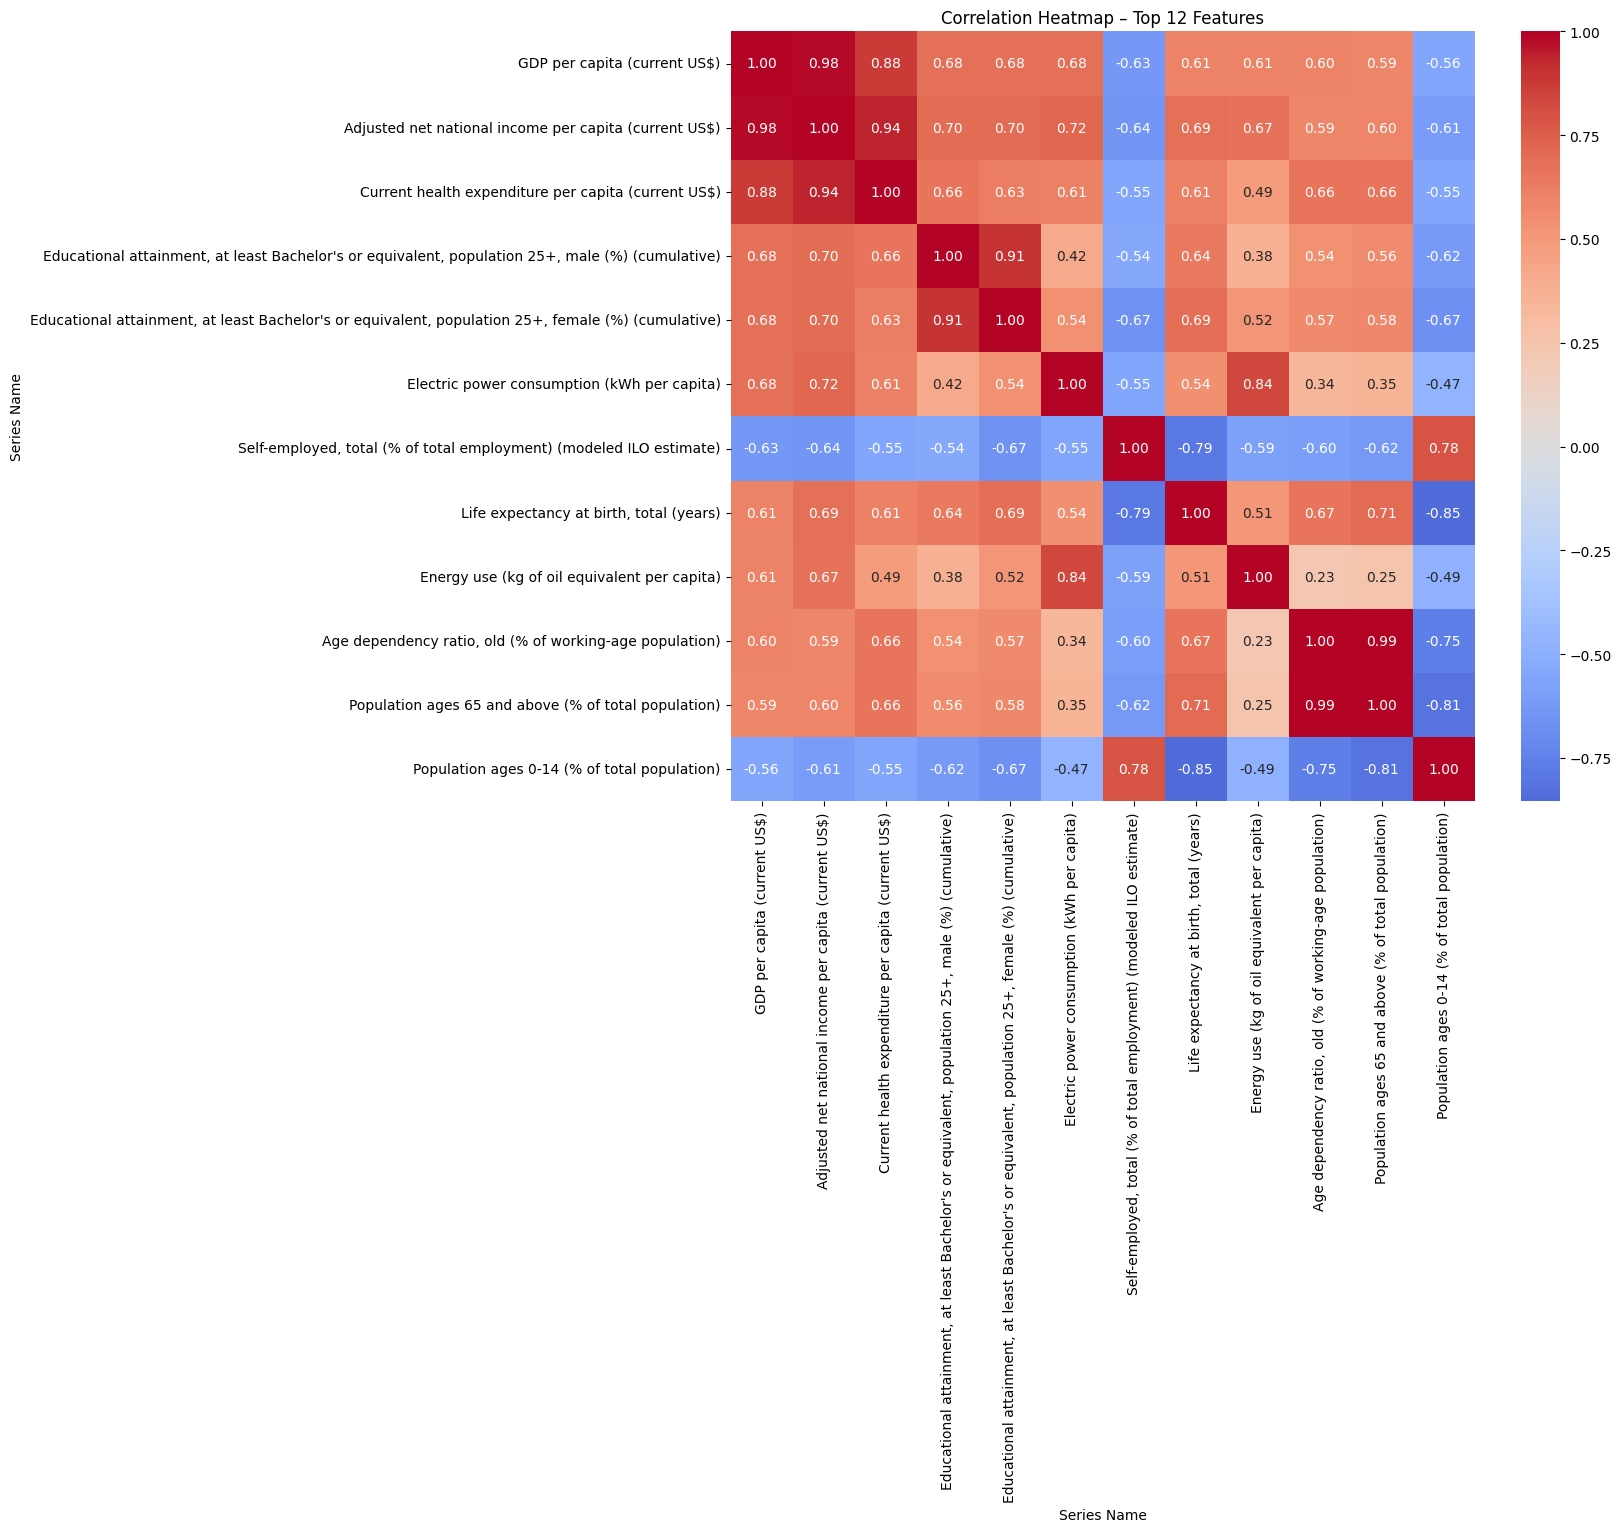

In [ ]:
# Visualizing the top 20 features according their correlation factors.
top_n = 12

top_features = (corr_matrix['GDP per capita (current US$)']
                .abs()
                .sort_values(ascending=False)
                .head(top_n)
                .index
               )

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_features, top_features],
            annot=True, cmap='coolwarm', fmt=".2f", center=0)   # Script snippet from Udacity 
plt.title(f'Correlation Heatmap – Top {top_n} Features')
plt.show()


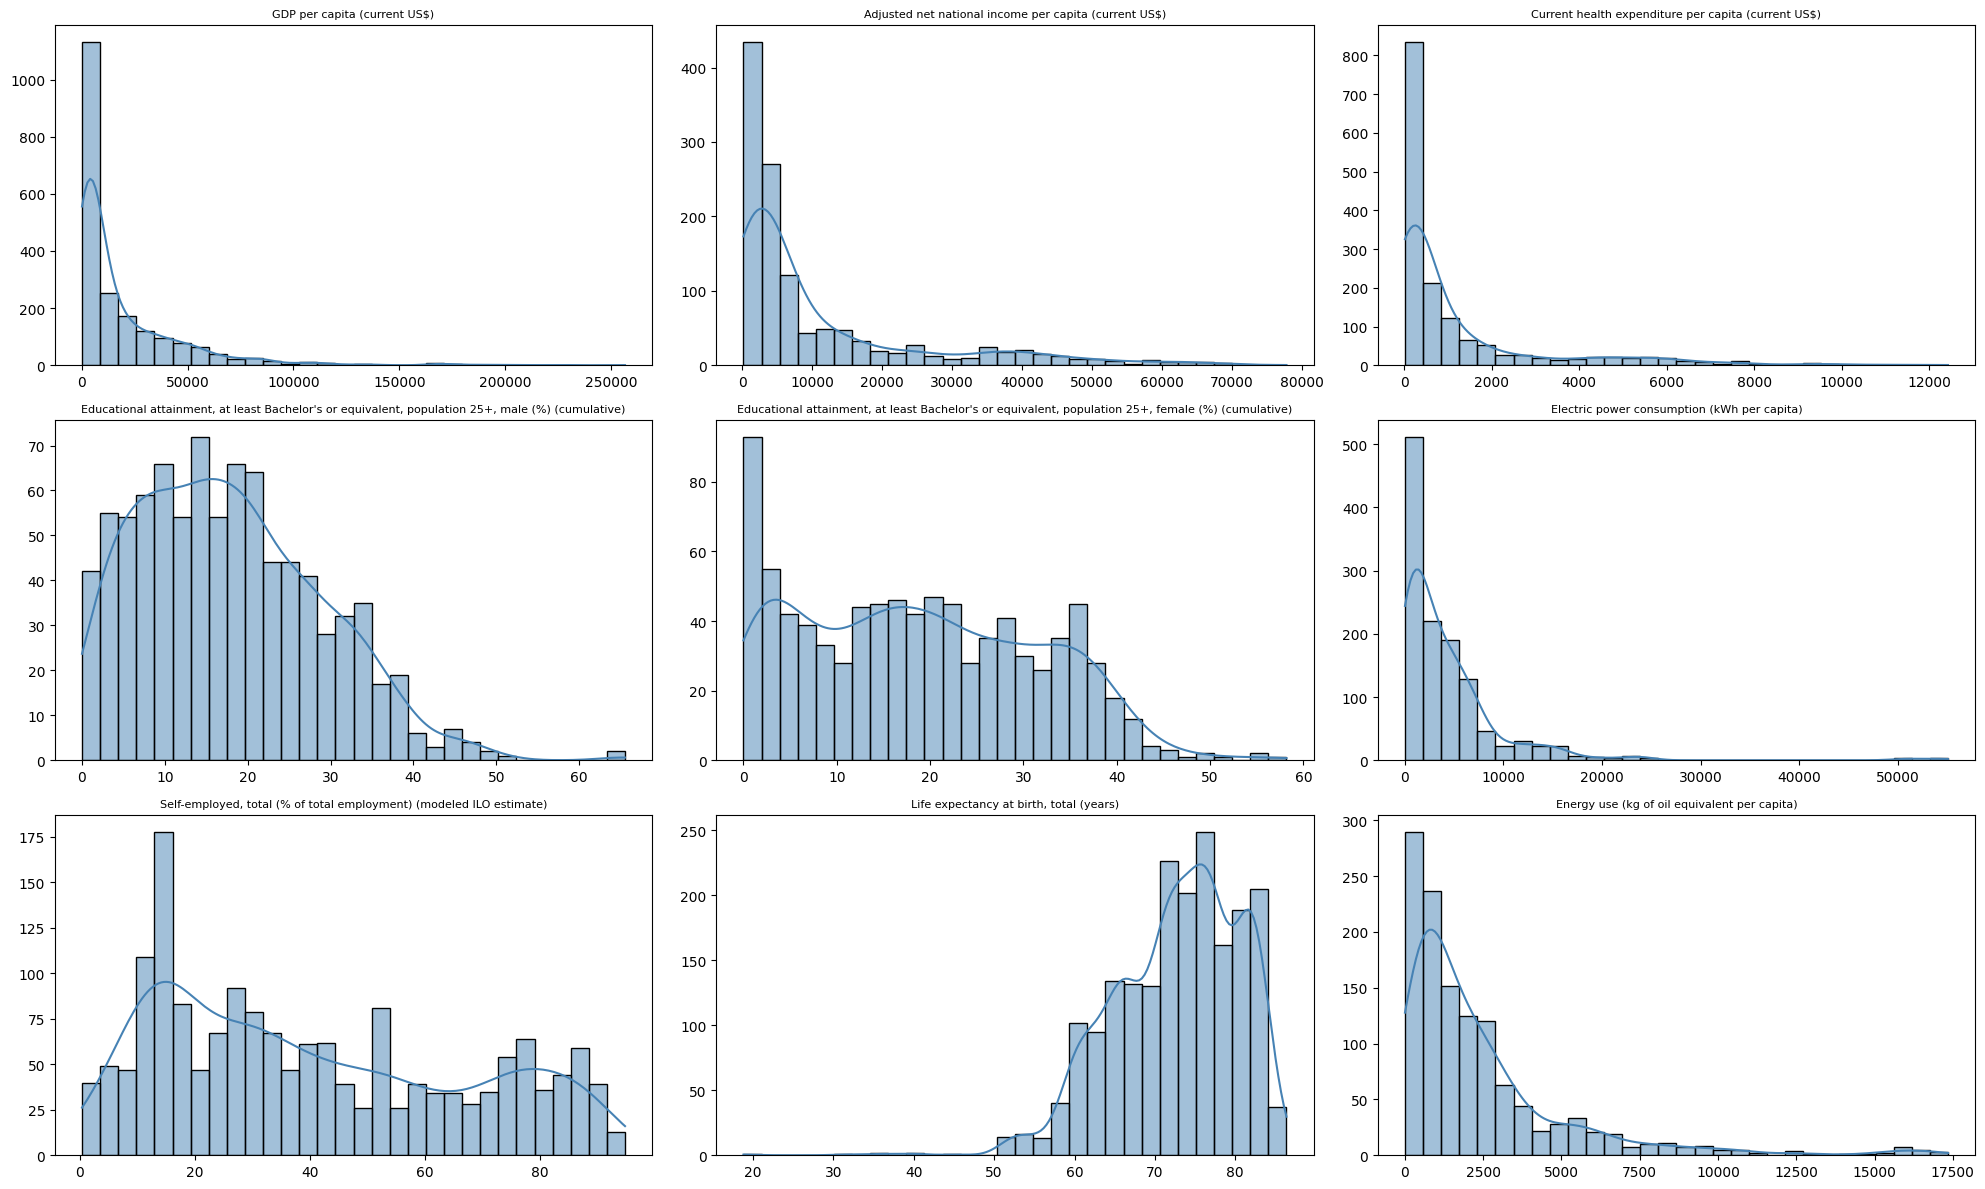

In [ ]:
# Top k Features according their correlation factors
top_k = 9
top_features = (corr_matrix['GDP per capita (current US$)']
                .abs()
                .sort_values(ascending=False)
                .head(top_k)
                .index
                .tolist()
               )

# Dataframe with the top k features
df_top = wdi_reshaped[top_features]

# Adjust the row number dynamically according the top k features
n_cols = 3
n_rows = (len(df_top.columns) + n_cols - 1) // n_cols

# plt.figure(figsize=(5 * n_cols, 4 * n_rows))
plt.figure(figsize=(20, 12))

# Script snippet from ChatGPT OpenAI 
for i, col in enumerate(df_top.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_top[col], kde=True, bins=30, color="steelblue")
    plt.title(col, fontsize=8)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [25]:
# Histogram plots for the most important features show that the data follows
# often a lognormal-distribution.
# This means: a lot of small values and a very small amount of data in higher ranges.

In [26]:
# Out of the correlation matrix, we can observe that the dataset has 
# multicollinearity (correlation between features). We have to drop one of 
# these features 
# Features to drop are: 
# ["Adjusted net national income per capita (current US$)", 
#  "Current health expenditure per capita (current US$)",
#  "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
#  "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
#  "Age dependency ratio, old (% of working-age population)",
#  "Energy use (kg of oil equivalent per capita)",
#  "Age dependency ratio, young (% of working-age population)",
# ]

# Data Preparation

In [27]:
# Drop multi-collinearity columns
wdi_multicoll_dropped = (wdi_reshaped
                          .drop(columns=["Adjusted net national income per capita (current US$)", 
                                         "Current health expenditure per capita (current US$)",
                                         "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
                                         "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
                                         "Age dependency ratio, old (% of working-age population)",
                                         "Energy use (kg of oil equivalent per capita)",
                                         "Age dependency ratio, young (% of working-age population)",
                                         "Access to electricity, rural (% of rural population)",
                                         "Population ages 65 and above (% of total population)",
                                        ]
                               )
                         )

# Drop columns with too many NaN-values
# Drop columns if more than 50% of the entries are NaN
wdi_drop_NaN = wdi_multicoll_dropped

wdi_drop_NaN = wdi_drop_NaN.dropna(axis=1, thresh=int(len(wdi_drop_NaN) * 0.5))

wdi_drop_NaN.shape

(2170, 51)

In [28]:
# Drop countries with too many NaN-values
# Drop countries if more than 30% of their data is NaN
wdi_cleaned = wdi_drop_NaN.dropna(axis=0, thresh=int(wdi_drop_NaN.shape[1] * 0.7))
wdi_cleaned.shape

(1643, 51)

In [29]:
# Fill the NaN-values with the median-value of the remaining data.
# I chose the median, because the histogramms show that a lot of the distributions are lognormal-distributed.
# Therefore the value is not easy impacted by values very far right on the scale.
wdi_cleaned = wdi_cleaned.fillna(wdi_cleaned.median(numeric_only=True))

In [30]:
# Get correlation factors of cleaned dataframe
corr_matrix_clean_data = wdi_cleaned.corr()

In [31]:
corr_matrix_clean_data['GDP per capita (current US$)'].sort_values(ascending=False)

Series Name
GDP per capita (current US$)                                                   1.000000
Life expectancy at birth, total (years)                                        0.662062
Electric power consumption (kWh per capita)                                    0.642474
Exports of goods and services (% of GDP)                                       0.534974
School enrollment, secondary (% gross)                                         0.445040
Population ages 15-64 (% of total population)                                  0.412273
Access to electricity (% of population)                                        0.385586
Mobile cellular subscriptions (per 100 people)                                 0.381467
High-technology exports (% of manufactured exports)                            0.358000
Immunization, measles (% of children ages 12-23 months)                        0.331544
Imports of goods and services (% of GDP)                                       0.327292
Access to electricit

In [32]:
# Correlation values seem reasonable. 
# Let's continue with scaling the data and prepare it with TTS for the 
# Linear Regression.

In [ ]:
target_column = "GDP per capita (current US$)"

# Split the data into features and labels
X = wdi_cleaned.drop(target_column, axis=1)
y = wdi_cleaned[target_column]

# Using StandardScaler() for scaling the data
# We scale the feature data, because we have features with different units and magnitude.
# Through scaling we achive the features to be more comparable.

# Script snippet from Udacity 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Modeling

In [ ]:
# Split the data and a set random_state to allow reproducability.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Create and train a linear regression model.
# Train a linear regression model on the training set
# Linear regression is chosen because we need to have better 
# feature interpretability to answer the business understanding questions.

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# Taking a look into the coefficients of the linear regression model
# for first impression.
coeff_model = linear_model.coef_

pd.Series(linear_model.coef_, index=X.columns).sort_values()

Series Name
Population ages 0-14 (% of total population)                                  -14301.083289
Self-employed, total (% of total employment) (modeled ILO estimate)            -6318.417724
Death rate, crude (per 1,000 people)                                           -5599.637085
Merchandise trade (% of GDP)                                                   -5509.261066
GDP growth (annual %)                                                          -5098.342393
Population ages 15-64 (% of total population)                                  -5027.980312
Imports of goods and services (% of GDP)                                       -4990.332101
Labor force, female (% of total labor force)                                   -4502.684650
Agriculture, forestry, and fishing, value added (% of GDP)                     -2603.395572
Employment to population ratio, 15+, male (%) (modeled ILO estimate)           -2555.586531
Expense (% of GDP)                                                  

# Evaluation

In [ ]:

# Script snippet from Udacity 
# Make predictions on the training and test set
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Calculate the R^2 of the data

# R2 score for train data
r2_train = r2_score(y_train, y_pred_train)
print("The R^2-Train value is {}.".format(round(r2_train,2)))

# R2 score for test data
r2_test = r2_score(y_test, y_pred_test)
print("The R^2-Test value is {}.".format(round(r2_test,2)))

# Calculate the root mean squared error on the training and test set
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'RMSE-Train: {rmse_train}')
rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f'RMSE-Test: {rmse_test}')

The R^2-Train value is 0.83.
The R^2-Test value is 0.81.
RMSE-Train: 8467.507960442399
RMSE-Test: 9070.466041599171


In [37]:
# The R^2-Train value is slightly higher than the R^2-Test value. 
# Taking the RMSE-Train/-Test into account, I would say that the model 
# is not overfitting and has a decent generalization.

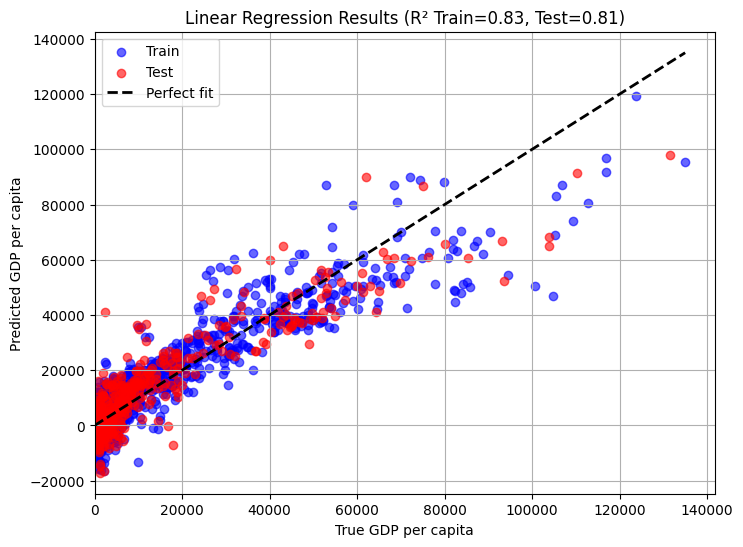

In [38]:
# Create a scatter plot to visualize the data and its regression.
# Evaluation of the results regarding the different GDP per capita ranges.

# Scatter Plot: True vs Predicted
plt.figure(figsize=(8, 6))

plt.scatter(y_train, y_pred_train, alpha=0.6, label="Train", color="blue")
plt.scatter(y_test, y_pred_test, alpha=0.6, label="Test", color="red")

# Diagonale Linie (perfekte Vorhersage)
min_val = min(y.min(), y_pred_train.min(), y_pred_test.min())
max_val = max(y.max(), y_pred_train.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label="Perfect fit")

plt.xlim([0, max_val*1.05])
plt.xlabel("True GDP per capita")
plt.ylabel("Predicted GDP per capita")
plt.title(f"Linear Regression Results (R² Train={r2_train:.2f}, Test={r2_test:.2f})")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Evaluate model predictions for both low-income and high-income countries.
# Due to the lognormal distribution of the GDP data, we have many observations 
# in the lower range. We would need more data in the higher range to achieve better predictions.
# Negative values should also not occur in the model predictions.

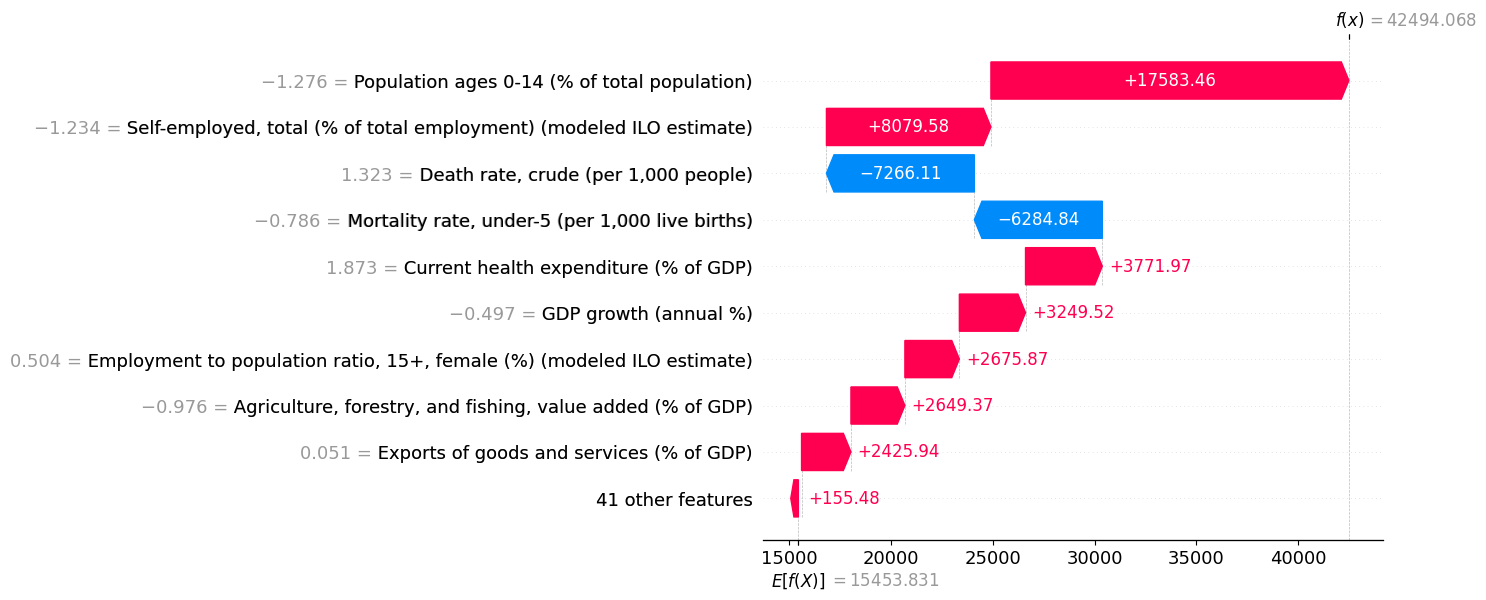

In [ ]:
# SHAP values # Script snippet from Udacity 

# Desired Country & Year
country, year = "Germany", 2023

# Find the row postion in the multi-index
row_pos = X_scaled_df.index.get_loc((country, year))

explainer = shap.Explainer(linear_model, X_scaled_df)
shap_values = explainer(X_scaled_df)

# Show the waterfall with feature names
shap.plots.waterfall(shap_values[row_pos])  


In [41]:
# Real GDP per capita values of "Germany"
y["Germany"]

Year
2015    41911.010985
2016    42961.035691
2017    45526.599958
2018    48874.859503
2019    47623.865607
2020    47379.765195
2021    52265.654162
2022    49686.115458
2023    53940.407345
Name: GDP per capita (current US$), dtype: float64

In [42]:
# The difference of the prediction and the true GDP per capita for Germany, 2023
# is 53940-42494=11446. This is higher than the RMSE-Test. This could result from the reason that we have less
# data in this high GDP per capita region.

# The SHAP waterfall plot shows that the feature 'Population ages 0-14 (% of total population)' (-1.276)
# has the highest impact in this example. A decreasing ratio in this population age
# lead to a higher ration in older population classes. This leads to a higher ratio
# of workforces in the population, thus a higher GDP per capita. 

In [ ]:
# Calculate residuals (actual - predicted)
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Combine true, predicted, and residuals into DataFrames
train_results = pd.DataFrame({
    "True GDP per capita": y_train,
    "Predicted GDP per capita": y_pred_train,
    "Residual": residuals_train
})

test_results = pd.DataFrame({
    "True GDP per capita": y_test,
    "Predicted GDP per capita": y_pred_test,
    "Residual": residuals_test
})

# Show top 10 largest residuals (absolute value) in test set # Script snippet from ChatGPT OpenAI 
largest_residuals = test_results.reindex(
    residuals_test.abs().sort_values(ascending=False).index
).head(10)

print("\nTop 10 absolute residuals (Test set):")
print(largest_residuals)



Top 10 absolute residuals (Test set):
                   True GDP per capita  Predicted GDP per capita      Residual
Country Name Year                                                             
Switzerland  2021         93664.773670              52124.435295  41540.338375
Ireland      2021        103961.976351              65109.180782  38852.795569
Djibouti     2015          2376.125547              41121.985375 -38745.859828
Ireland      2023        103887.800388              68106.205932  35781.594456
Luxembourg   2023        131407.681365              97990.068542  33417.612823
Iceland      2016         61987.926362              89945.408926 -27957.482564
Maldives     2015          9644.906550              36458.602593 -26813.696043
Norway       2021         93072.892512              66726.721175  26346.171337
Guyana       2022         17913.492807              -7073.246758  24986.739565
Maldives     2022         11786.009155              36708.176199 -24922.167044


# Communication

In [44]:
# Answering the questions of the Business Understanding
# 1. “Which socio-economic factors best explain differences in GDP per capita according to an country-example?”
# -> According to the country example "Germany" the top three socio-economic factors are as following:
#     1. Population ages 0-14 (% of total population)
#     2. Self-employed, total (% of total employment) (modeled ILO estimate)
#     3. Death rate, crude (per 1,000 people)
# 2. “To what extent can development indicators (e.g., health, education, demographics) be used to predict a country’s GDP per capita?” -> RMSE as metric
# -> As of now, the development indicators allow us predictions in the lower GDP per capita range. 
#    Even though there are predictions with negative values.
# 3. "Which countries are under-/over-predicted (residual analysis) and what does that imply?"
# -> Very wealthy countries such as Switzerland, Ireland, Luxembourg, Norway were underpredicted. 
#    Small or unique economies like Djibouti, Maldives, Guyana showed very large errors. 
#    In rare cases, the model even produced negative predictions (e.g., Guyana 2022) - clearly unrealistic.
#    Interpretation: The model works best for low- and middle-income countries, where it can fill data gaps. 
#    But it should not be relied upon for extreme cases, where economic structures deviate from global patterns.